# Medical Cost Personal Insurance Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Medical_Cost_Personal_Insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
print('The shape :',df.shape)

The shape : (1338, 7)


In [7]:
df=df.drop_duplicates()

In [8]:
print('The shape after dropping duplicates :',df.shape)

The shape after dropping duplicates : (1337, 7)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Mean is greater than median in Charges.
There is large differnce between 75 th percentile and max in charges column.

In [13]:
cat_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        cat_cols.append(x)
print('Object Data Type Columns:',cat_cols)

num_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        num_cols.append(x)
print('Numerical Data Type Columns:',num_cols)

Object Data Type Columns: ['sex', 'smoker', 'region']
Numerical Data Type Columns: ['age', 'bmi', 'children', 'charges']


In [14]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('='*50)

sex
male      675
female    662
Name: sex, dtype: int64
smoker
no     1063
yes     274
Name: smoker, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


male      675
female    662
Name: sex, dtype: int64


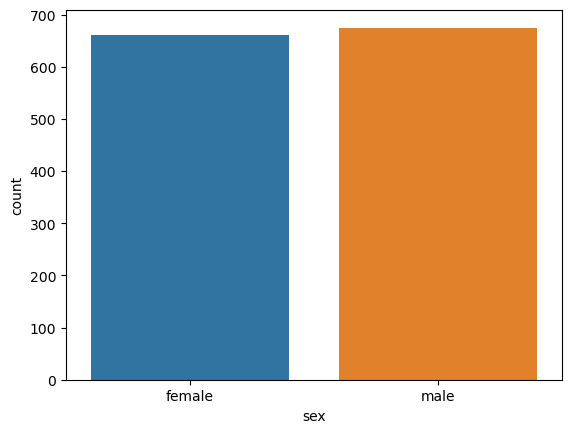

In [15]:
ax=sns.countplot(x='sex',data=df[cat_cols])
print(df['sex'].value_counts())

no     1063
yes     274
Name: smoker, dtype: int64


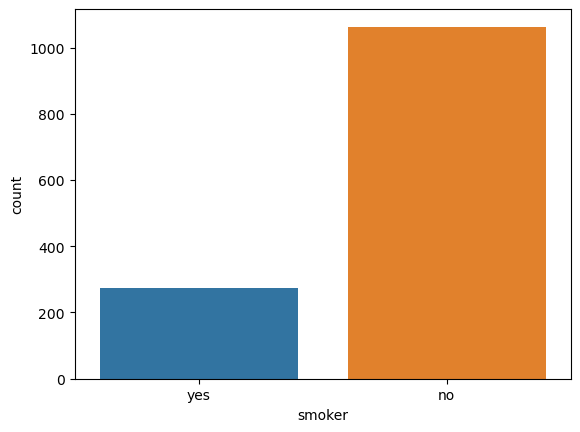

In [16]:
ax=sns.countplot(x='smoker',data=df[cat_cols])
print(df['smoker'].value_counts())

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


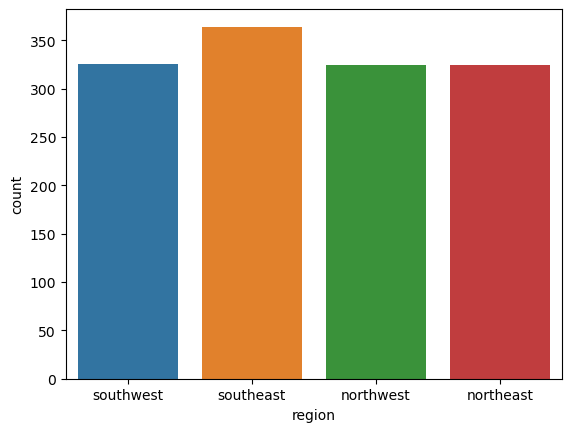

In [17]:
ax=sns.countplot(x='region',data=df[cat_cols])
print(df['region'].value_counts())

<AxesSubplot:>

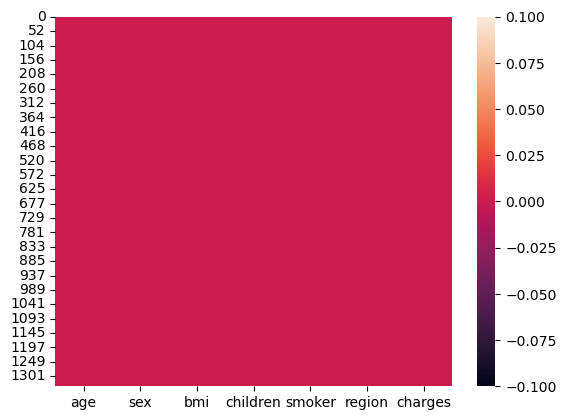

In [23]:
sns.heatmap(df.isnull())

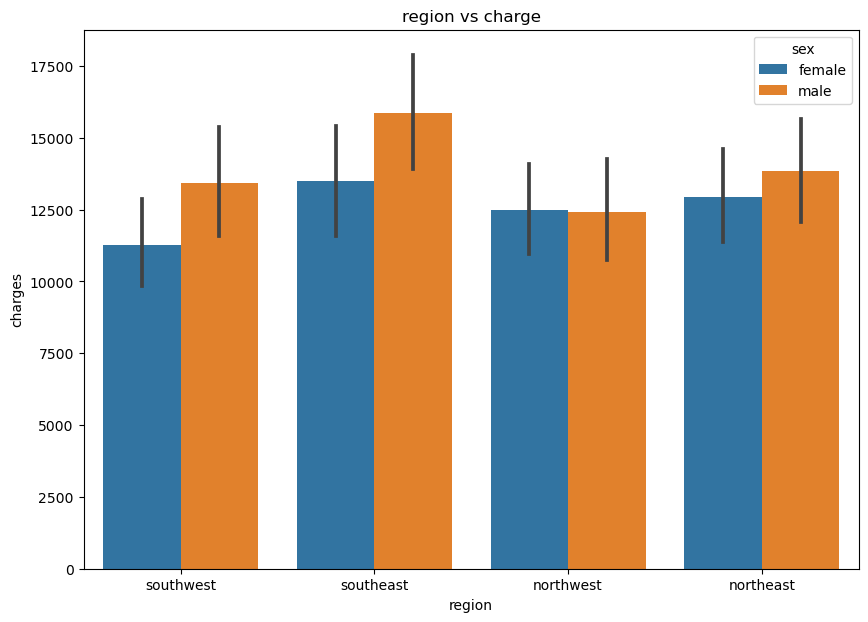

In [38]:
plt.figure(figsize=(10,7))
plt.title('region vs charge')
sns.barplot(x='region',y='charges',hue='sex',data=df)
plt.show()

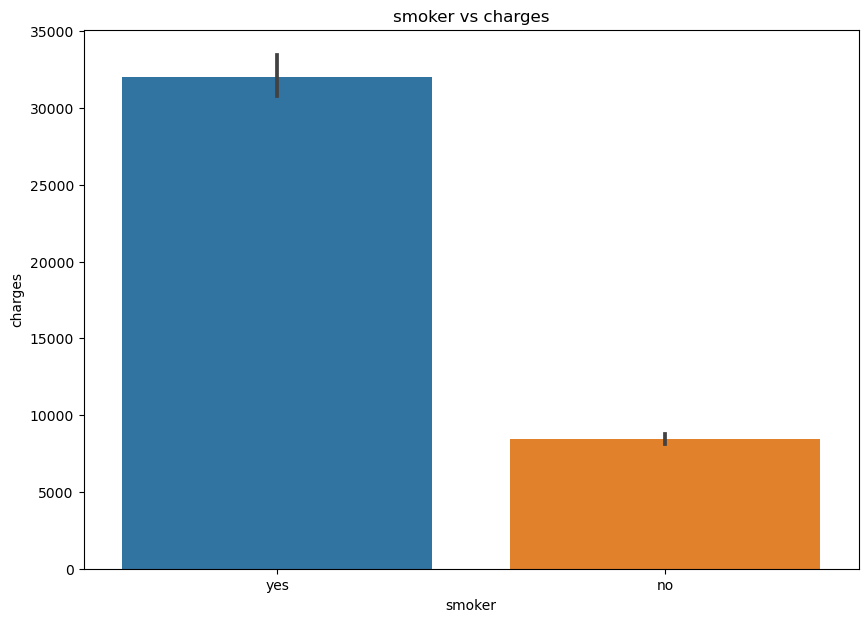

In [32]:
plt.figure(figsize=(10,7))
plt.title('smoker vs charges')
sns.barplot(x='smoker',y='charges',data=df)
plt.show()

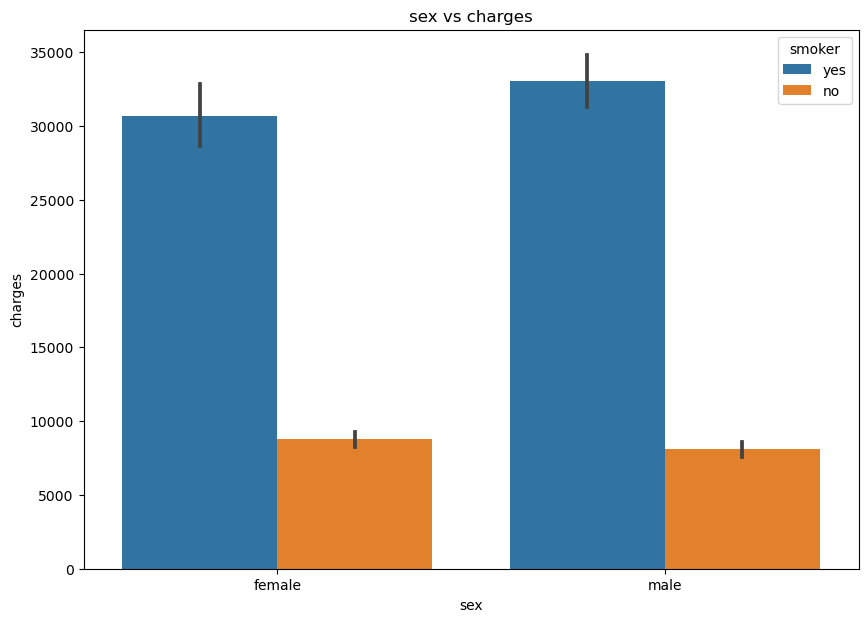

In [35]:
plt.figure(figsize=(10,7))
plt.title('sex vs charges')
sns.barplot(x='sex',y='charges',hue='smoker',data=df)
plt.show()

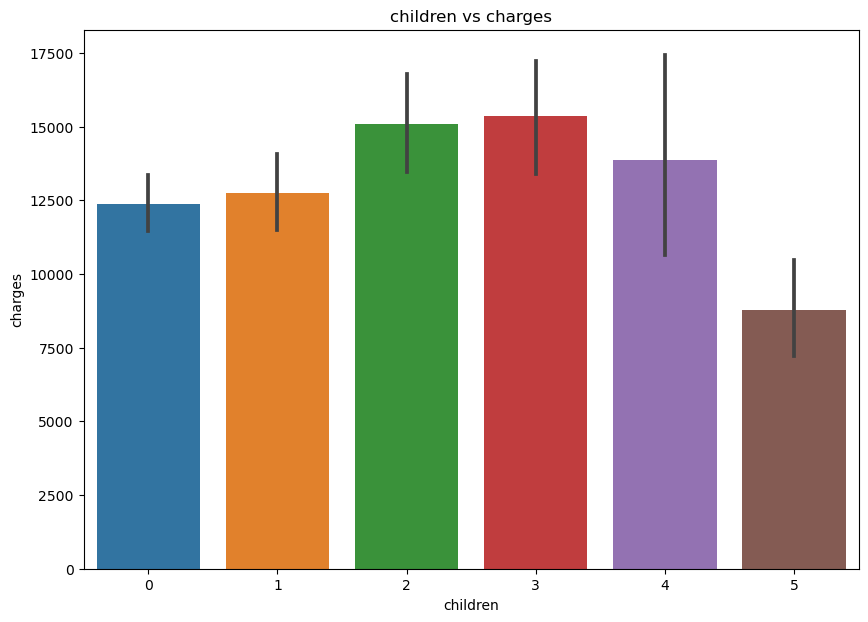

In [37]:
plt.figure(figsize=(10,7))
plt.title('children vs charges')
sns.barplot(x='children',y='charges',data=df)
plt.show()

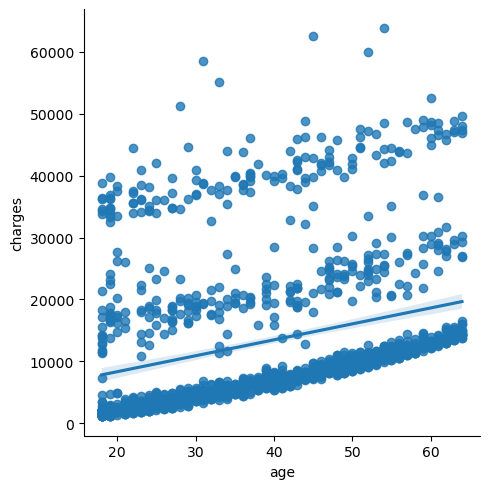

In [39]:
sns.lmplot(x='age',y='charges',data=df)

Age has a positive correlation with charges

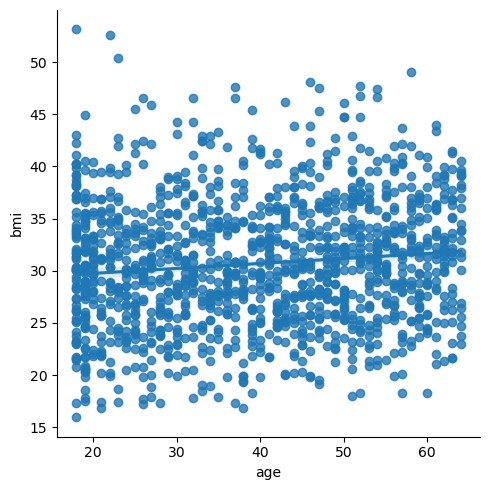

In [40]:
sns.lmplot(x='age',y='bmi',data=df)

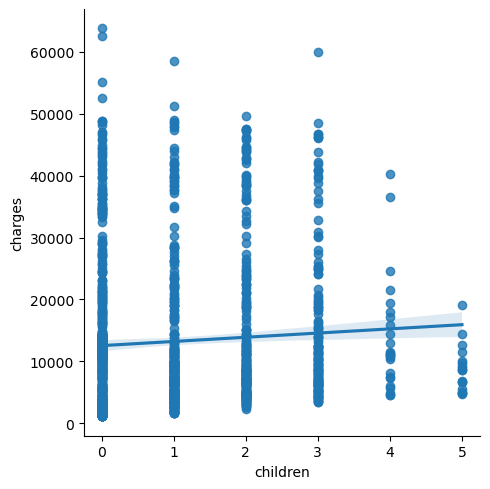

In [41]:
sns.lmplot(x='children',y='charges',data=df)

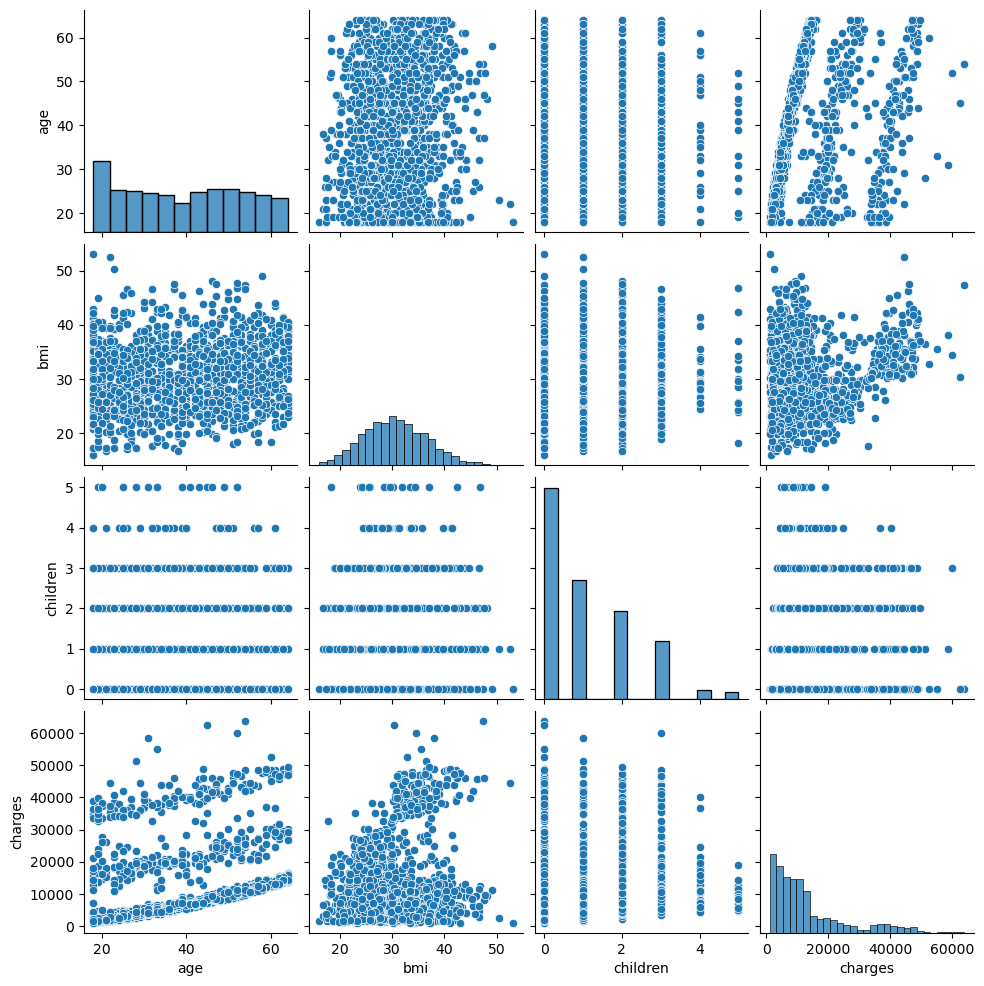

In [42]:
sns.pairplot(data=df)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
lr=LabelEncoder()

In [51]:
for i in df[cat_cols]:
    df[i]=lr.fit_transform(df[i])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


age            AxesSubplot(0.125,0.747241;0.133621x0.132759)
sex         AxesSubplot(0.285345,0.747241;0.133621x0.132759)
bmi          AxesSubplot(0.44569,0.747241;0.133621x0.132759)
children    AxesSubplot(0.606034,0.747241;0.133621x0.132759)
smoker      AxesSubplot(0.766379,0.747241;0.133621x0.132759)
region         AxesSubplot(0.125,0.587931;0.133621x0.132759)
charges     AxesSubplot(0.285345,0.587931;0.133621x0.132759)
dtype: object

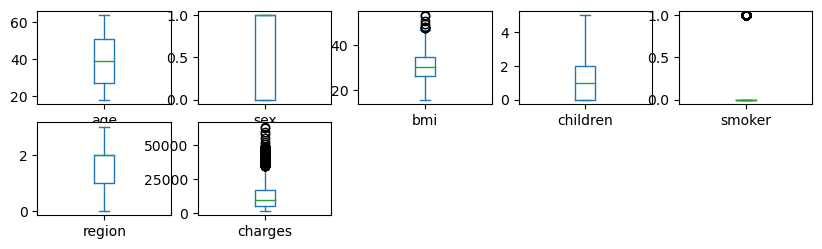

In [52]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,7))

Outliers are present in bmi and charges columns

In [53]:
from scipy.stats import zscore

In [54]:
z=np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.440418,1.009771,0.453160,0.909234,1.969660,1.343163,0.297857
1,1.511647,0.990324,0.509422,0.079442,0.507702,0.438017,0.954381
2,0.799350,0.990324,0.383155,1.580143,0.507702,0.438017,0.729373
3,0.443201,0.990324,1.305052,0.909234,0.507702,0.467128,0.719104
4,0.514431,0.990324,0.292456,0.909234,0.507702,0.467128,0.777499
...,...,...,...,...,...,...,...
1333,0.767704,0.990324,0.050269,1.580143,0.507702,0.467128,0.221263
1334,1.511647,1.009771,0.206053,0.909234,0.507702,1.372274,0.914695
1335,1.511647,1.009771,1.014490,0.909234,0.507702,0.438017,0.962287
1336,1.297958,1.009771,0.797524,0.909234,0.507702,1.343163,0.931054


In [55]:
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
       1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [56]:
df_new=df[(z<3).all(axis=1)]
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


29 rows are cleared

age            AxesSubplot(0.125,0.747241;0.133621x0.132759)
sex         AxesSubplot(0.285345,0.747241;0.133621x0.132759)
bmi          AxesSubplot(0.44569,0.747241;0.133621x0.132759)
children    AxesSubplot(0.606034,0.747241;0.133621x0.132759)
smoker      AxesSubplot(0.766379,0.747241;0.133621x0.132759)
region         AxesSubplot(0.125,0.587931;0.133621x0.132759)
charges     AxesSubplot(0.285345,0.587931;0.133621x0.132759)
dtype: object

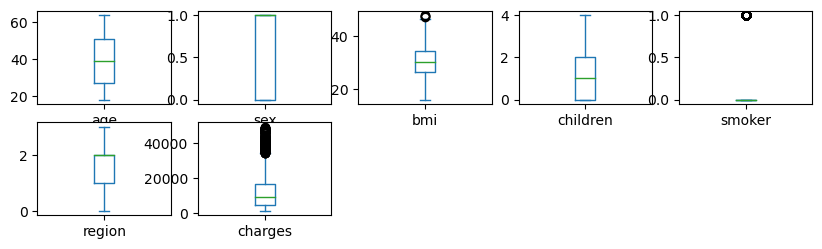

In [57]:
df_new.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,7))

In [58]:
df_new.skew()

age         0.050421
sex        -0.009185
bmi         0.191361
children    0.737050
smoker      1.481539
region     -0.024001
charges     1.436653
dtype: float64

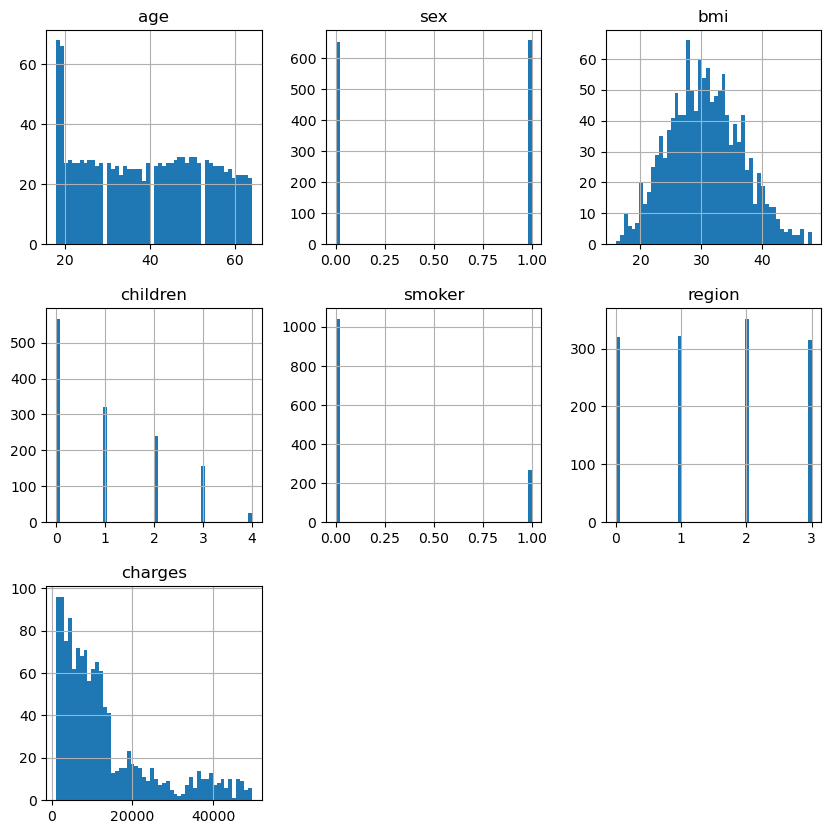

In [59]:
df_new.hist(figsize=(10,10),bins=50)
plt.show()

In [60]:
for col in df_new:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [61]:
df_new.skew()

age         0.050421
sex        -0.009185
bmi         0.191361
children    0.224207
smoker      1.481539
region     -0.024001
charges    -0.106876
dtype: float64

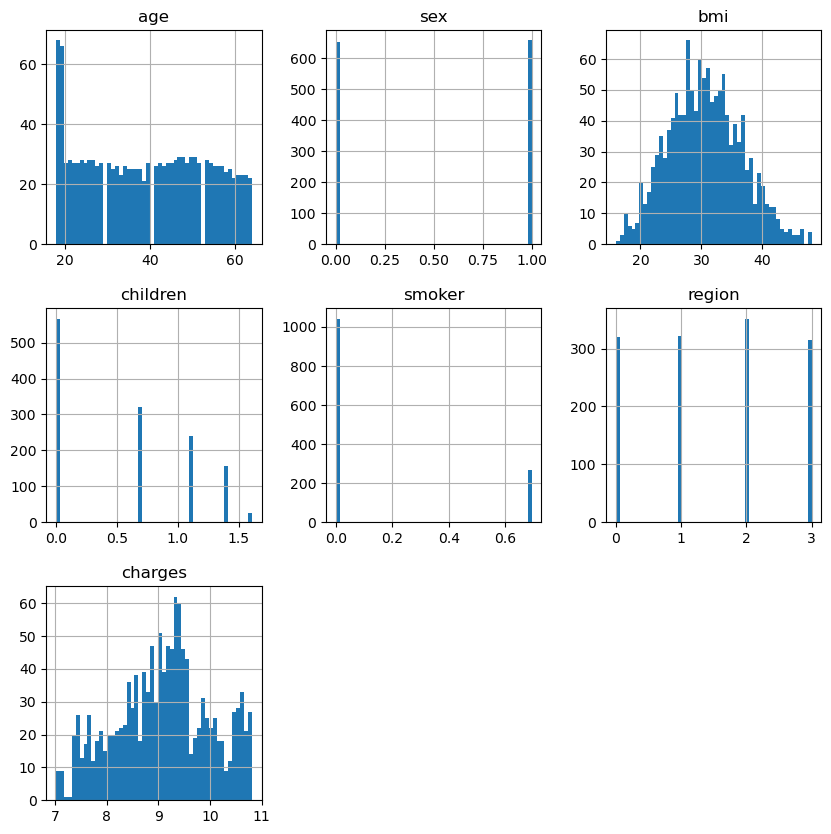

In [62]:
df_new.hist(figsize=(10,10),bins=50)
plt.show()

In [63]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<AxesSubplot:>

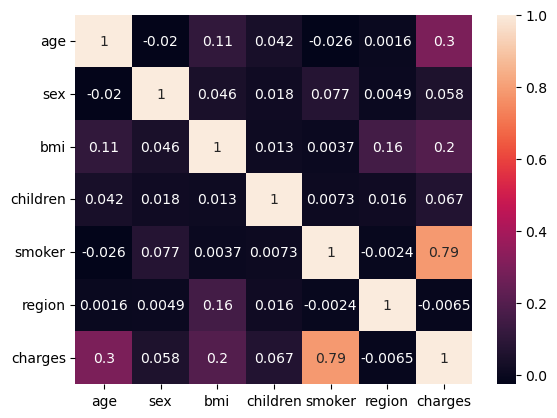

In [64]:
sns.heatmap(df.corr(),annot=True)

In [66]:
x=df_new.drop('charges',axis=1)
y=df_new['charges']

print('Shape of x:',x.shape)
print('Shape of y:',y.shape)

Shape of x: (1308, 6)
Shape of y: (1308,)


In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440754,-1.004598,-0.449186,-1.042752,1.983897,1.351994
1,-1.511806,0.995423,0.533188,0.231416,-0.504058,0.446975
2,-0.801288,0.995423,0.404324,1.505584,-0.504058,0.446975
3,-0.446029,0.995423,-1.318596,-1.042752,-0.504058,-0.458045
4,-0.517081,0.995423,-0.285179,-1.042752,-0.504058,-0.458045
...,...,...,...,...,...,...
1303,0.761851,0.995423,0.064594,1.505584,-0.504058,-0.458045
1304,-1.511806,-1.004598,0.223581,-1.042752,-0.504058,-1.363065
1305,-1.511806,-1.004598,1.048641,-1.042752,-0.504058,0.446975
1306,-1.298651,-1.004598,-0.800632,-1.042752,-0.504058,1.351994


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.019105,age
1,1.008853,sex
2,1.043795,bmi
3,1.005004,children
4,1.007997,smoker
5,1.026634,region


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR

In [77]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print('Maximum r2 score is',maxAcc,' on Random State',maxRS)

Maximum r2 score is 0.8182077003679433  on Random State 34


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [79]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_LR))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score:  0.8182077003679433
R2 Score on training data:  73.99892669055406
Mean Absolute Error:  0.2664368864520645
Mean Squared Error:  0.15469361376999416
Root Mean Squared Error:  0.3933110903216361


In [80]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso=ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))
print('Mean squared error:',np.sqrt(mean_squared_error(y_test,predlasso)))

0.7392163316998341
0.15724415374103137
Mean squared error: 0.39654022966280655


In [81]:
ls.coef_

array([ 0.46808964, -0.01830952,  0.06069762,  0.11105053,  0.60561712,
       -0.03247233])

In [82]:
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))

predridge=rd.predict(x_test)
print(mean_squared_error(y_test,predridge))
print('Mean squared error:',np.sqrt(mean_squared_error(y_test,predridge)))

0.7399892668100522
0.1546939773991284
Mean squared error: 0.3933115525879305


In [83]:
rd.coef_

array([ 0.47688762, -0.02960699,  0.07180553,  0.11986596,  0.61718828,
       -0.04477783])

In [85]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
pred_y
print('Mean squared error :',np.sqrt(mean_squared_error(y_test,pred_y)))

svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y = svr.predict(x_test)
pred_y
print('Mean squared error :',np.sqrt(mean_squared_error(y_test,pred_y)))

svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
pred_y
print('Mean squared error :',np.sqrt(mean_squared_error(y_test,pred_y)))

0.7177637906931971
Mean squared error : 0.39408096919069935
0.7877671844125139
Mean squared error : 0.2962725606457741
0.8050499231926209
Mean squared error : 0.2737182196377114


In [86]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred_gr=gr.predict(x_test)
pred_train=gr.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_gr))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_gr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_gr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_gr)))

R2 Score:  0.8886787006402708
R2 Score on training data:  86.61041768271436
Mean Absolute Error:  0.18204785337574322
Mean Squared Error:  0.09472730210455631
Root Mean Squared Error:  0.3077780078312229


In [87]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
pred_train=rf.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_rf))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rf))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rf)))

R2 Score:  0.877421789583554
R2 Score on training data:  96.56450431644421
Mean Absolute Error:  0.1843702903445244
Mean Squared Error:  0.10430621306379617
Root Mean Squared Error:  0.3229647241786573


In [90]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
pred_train=dt.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_dt))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_dt))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_dt))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_dt)))

R2 Score:  0.6748158458136615
R2 Score on training data:  99.6593474264395
Mean Absolute Error:  0.23881022118846354
Mean Squared Error:  0.2767109060924891
Root Mean Squared Error:  0.5260331796498098


In [92]:
kn=KNN()
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
pred_train=kn.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_kn))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_kn))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_kn))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_kn)))

R2 Score:  0.8484718424779629
R2 Score on training data:  83.27886823114518
Mean Absolute Error:  0.2312043148778957
Mean Squared Error:  0.1289407654913643
Root Mean Squared Error:  0.3590832291981405


We are choosing Gradient Boosting Regressor as best model.Because its r2 score is high

In [93]:
import pickle

In [94]:
filename='Medical Cost Personal Insurance Project.pkl'

In [95]:
pickle.dump(gr,open(filename,'wb'))

In [96]:
loaded_model=pickle.load(open('Medical Cost Personal Insurance Project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

88.86787006402707


In [97]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,383,384,385,386,387,388,389,390,391,392
Predicted,9.355818,9.344994,9.476827,10.699711,8.218673,9.208588,9.309586,9.794508,7.523685,9.069920,...,8.520780,9.403587,9.391605,9.277538,8.687019,9.857324,8.818921,10.487048,10.708443,9.470959
Original,8.958866,8.830587,11.004249,11.019361,8.613543,8.468302,9.314798,9.225056,9.079621,9.274305,...,9.599359,8.055891,8.973530,10.882631,10.061487,9.006147,9.076216,8.570400,9.228594,7.916071
